<a href="https://colab.research.google.com/github/RishikJ/Face-recognition-with-attendance/blob/master/Copy_of_HACKANONS_COLAB_25GB_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, History

In [3]:
df_train = pd.read_csv("/content/drive/My Drive/Hackathon/train_label.csv")
print(df_train.head())     # printing first five rows of the file
print(df_train.columns)

          file_name  label
0  Image_000000.jpg      8
1  Image_000001.jpg      8
2  Image_000002.jpg      8
3  Image_000003.jpg      8
4  Image_000004.jpg      8
Index(['file_name', 'label'], dtype='object')


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31749 entries, 0 to 31748
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  31749 non-null  object
 1   label      31749 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 496.2+ KB


In [5]:
df_train["label"].value_counts()

6     6285
3     4139
9     3933
7     3664
2     2778
5     2433
8     2338
0     2166
4     2052
10    1039
1      922
Name: label, dtype: int64

In [ ]:
X = np.load("/content/drive/My Drive/Hackathon/xdataset.pkl.npy")
from tensorflow.keras.applications.resnet50 import preprocess_input
X = preprocess_input(X)

In [7]:
y = df_train["label"]
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
SIZE = 100
model = ResNet50(include_top = False, weights = "imagenet", input_shape = (SIZE,SIZE,3))

x = Flatten()(model.layers[-1].output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(11, activation='softmax')(x)
model = Model(inputs = model.inputs, outputs = output)

for layers in model.layers[:143]:
    layers.trainable = False
model.summary()

94781440/94765736 [==============================] - 1s 0us/step


NameError: ignored

In [15]:
history = History()
callbacks = [history, 
             EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=1, cooldown=0, min_lr=1e-7, verbose=1),
             ModelCheckpoint(filepath='fashionResNet50.best.hdf5', 
             monitor='val_accuracy', verbose=1, 
             save_best_only=True, save_weights_only=True, mode='auto')]

In [16]:
opt = Adam(lr=1e-4)           
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
history = model.fit(X_train, y_train, epochs=4 ,verbose = 1, validation_data=(X_test, y_test), batch_size=32, callbacks = callbacks)

Epoch 1/4
695/695 [==============================] - ETA: 0s - loss: 1.4054 - accuracy: 0.5225
Epoch 00001: val_accuracy improved from -inf to 0.54562, saving model to fashionResNet50.best.hdf5
695/695 [==============================] - 276s 397ms/step - loss: 1.4054 - accuracy: 0.5225 - val_loss: 1.3385 - val_accuracy: 0.5456 - lr: 1.0000e-04
Epoch 2/4
695/695 [==============================] - ETA: 0s - loss: 1.0699 - accuracy: 0.6365
Epoch 00002: val_accuracy improved from 0.54562 to 0.55738, saving model to fashionResNet50.best.hdf5
695/695 [==============================] - 277s 398ms/step - loss: 1.0699 - accuracy: 0.6365 - val_loss: 1.3358 - val_accuracy: 0.5574 - lr: 1.0000e-04
Epoch 3/4
695/695 [==============================] - ETA: 0s - loss: 0.7828 - accuracy: 0.7305
Epoch 00003: val_accuracy improved from 0.55738 to 0.56619, saving model to fashionResNet50.best.hdf5
695/695 [==============================] - 283s 407ms/step - loss: 0.7828 - accuracy: 0.7305 - val_loss: 1.3

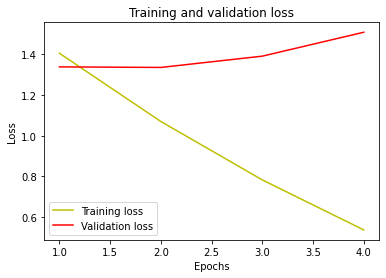

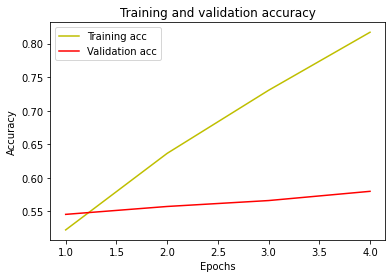

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
df = pd.read_csv("/content/drive/My Drive/Hackathon/sample_submission.csv") 

In [24]:
X_dataset_set = np.load("/content/drive/My Drive/Hackathon/xdataset_test.npy")
from tensorflow.keras.applications.resnet50 import preprocess_input
X_dataset_set = preprocess_input(X_dataset_set)

y_dataset_test = model.predict(X_dataset_set)
y_dataset_test_label = (np.argmax(y_dataset_test, axis=1)).reshape(-1, 1)

In [25]:
df_test = pd.DataFrame(y_dataset_test_label, columns = ["label"])
df["label"] = df_test["label"]

df.to_csv("result.csv",index = False)

drive/  fashionResNet50.best.hdf5  result.csv  sample_data/
